## ML-based fraud detection

Problem statement name

Develop and maintain ML-based fraud detection models that are effective at identifying evolving fraud patterns even in the presence of imbalanced data.

Overview

Fraudulent activities such as credit card fraud, insurance fraud, and identity theft is a problem for businesses and individuals alike. Traditional fraud detection techniques often rely on rule-based systems that require human experts to manually update the rules as new fraud patterns emerge. These methods can be time-consuming, expensive, and often fail to detect new and evolving fraud patterns.

Overall, the goal of ML-based fraud detection is to develop models that can detect fraud patterns in real-time, while minimizing false positives and false negatives. By addressing the challenges outlined in the problem statement, businesses and individuals can better protect themselves from the financial and reputational damage caused by fraud.

TASK -01 : DATA COLLECTION AND PREPARATION

ABOUT DATASET

In [5]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 11
LABELS = ["Normal", "Fraud"]





In [10]:
filepath=r"C:\Users\joyee\Downloads\creditcard.csv\creditcard.csv"
data = pd.read_csv(filepath,sep=',')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# FOR CLEAR UNDERSTANDING OF THE GIVEN DATA, WE'LL USE INFO COMMAND

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### DATA ANALYSIS PHASE

In [14]:
##step01 : checking for null values
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

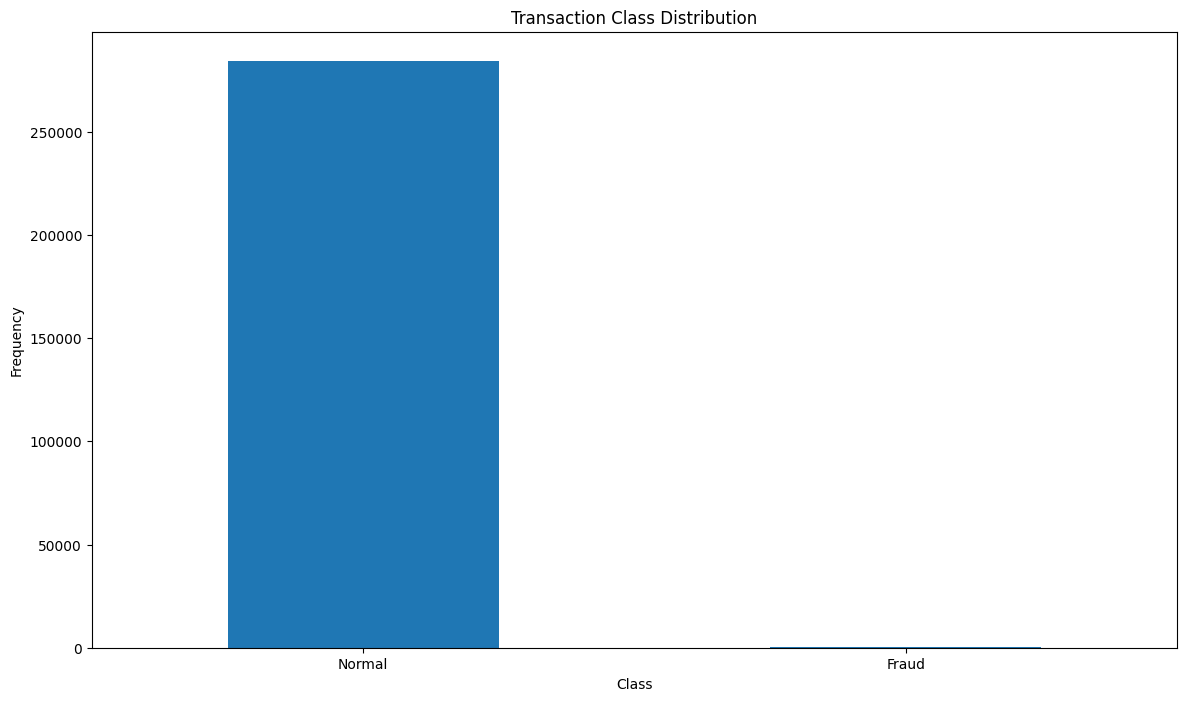

In [15]:
## we will count the number of occurence of each unique value in the 'class'
count_classes = pd.value_counts(data['Class'], sort = True) ## It'll sort in descending order

count_classes.plot(kind = 'bar', rot=0) 

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [16]:
## We observed that the fraud cases are really less compared to normal cases. The dataset is highly imbalanced
## Because we need to find the fraud cases we'll assign it 1
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [17]:
# Displaying the number of rows and columns of both the fraud and normal subsets of the dataset
print(fraud.shape,normal.shape)


(492, 31) (284315, 31)


In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

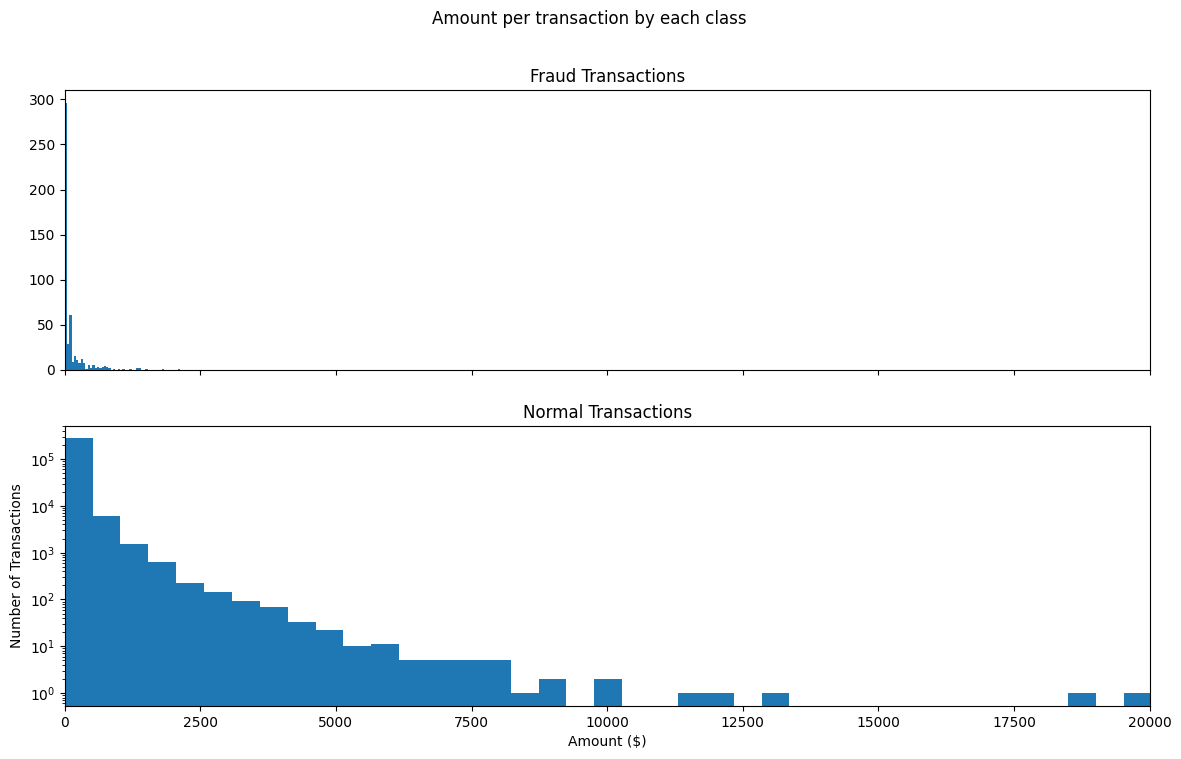

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by each class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud Transactions')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

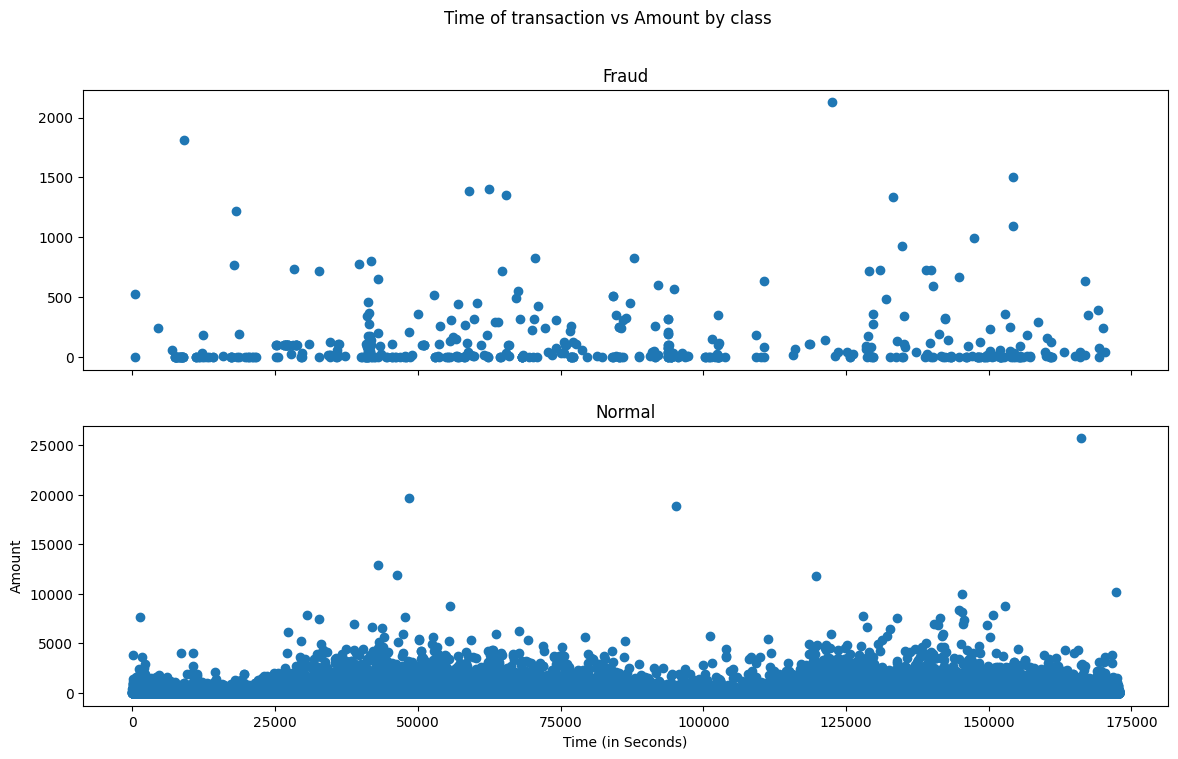

In [25]:
# We need to check if fraud transactions occur more often during certain time frame 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()